# You can get the notebook in kaggle :
https://www.kaggle.com/datasets/arsalanjamal002/student-sleep-patterns

# The imports

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure plots are displayed inline
%matplotlib inline

# Reading the dataset 

In [3]:
df = pd.read_csv('student_sleep_patterns.csv')

# Inspection of the Data

In [4]:
df.isnull().sum()


Student_ID             0
Age                    0
Gender                 0
University_Year        0
Sleep_Duration         0
Study_Hours            0
Screen_Time            0
Caffeine_Intake        0
Physical_Activity      0
Sleep_Quality          0
Weekday_Sleep_Start    0
Weekend_Sleep_Start    0
Weekday_Sleep_End      0
Weekend_Sleep_End      0
dtype: int64

In [14]:
df.head()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01


# Data Preprocessing

In [6]:
df['University_Year'] = df['University_Year'].replace({
    '1st Year': 1,
    '2nd Year': 2,
    '3rd Year': 3,
    '4th Year': 4
})

/tmp/ipykernel_4175/943292421.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['University_Year'] = df['University_Year'].replace({


# Distribution of 'Sleep_Duration'

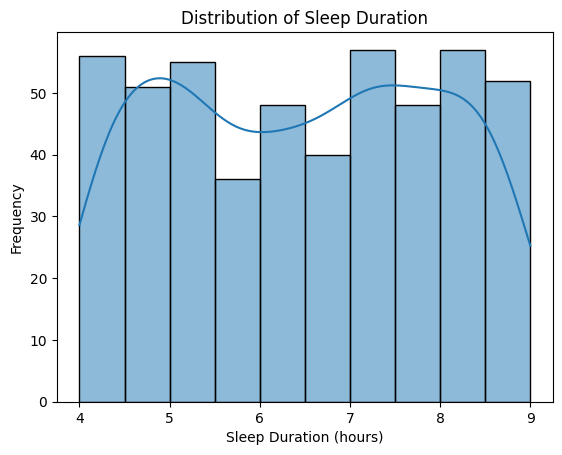

In [11]:
sns.histplot(df['Sleep_Duration'], kde=True)
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

# Relationship between 'Study_Hours'<br>and 'Sleep_Duration'

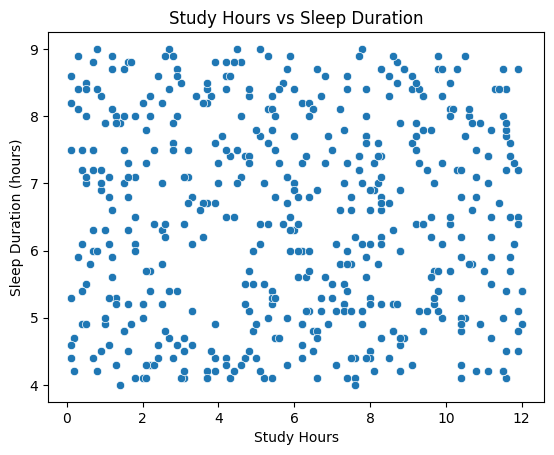

In [12]:
sns.scatterplot(x='Study_Hours', y='Sleep_Duration', data=df)
plt.title('Study Hours vs Sleep Duration')
plt.xlabel('Study Hours')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# Correlation matrix

Text(0.5, 1.0, 'Correlation Matrix')

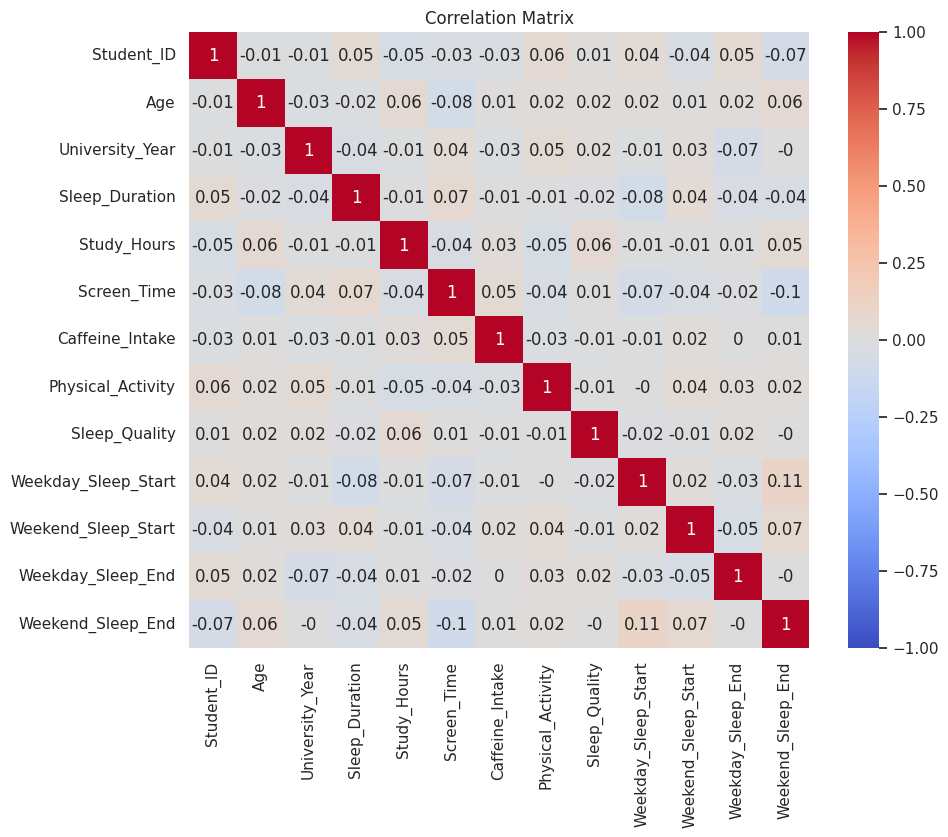

In [ ]:
sns.set(style="white")
corr_matrix = df.drop(columns=['Gender']).corr().round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')

# Sleep Quality by Gender

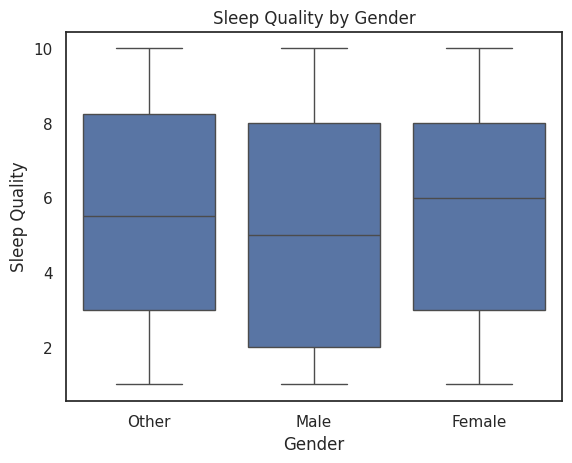

In [20]:
sns.boxplot(x='Gender', y='Sleep_Quality', data=df)
plt.title('Sleep Quality by Gender')
plt.xlabel('Gender')
plt.ylabel('Sleep Quality')
plt.show()

# Effect of Caffeine Intake on Sleep Quality

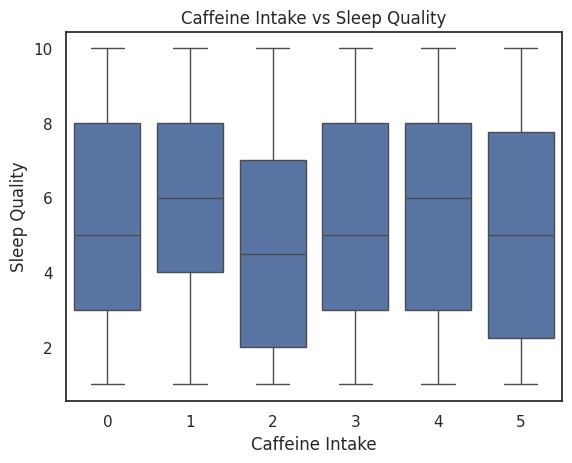

In [22]:
sns.boxplot(x='Caffeine_Intake', y='Sleep_Quality', data=df)
plt.title('Caffeine Intake vs Sleep Quality')
plt.xlabel('Caffeine Intake')
plt.ylabel('Sleep Quality')
plt.show()

# Sleep Duration by Age Group

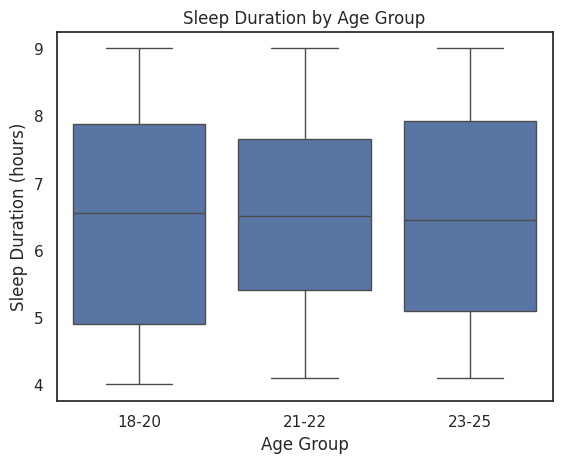

In [ ]:
df['Age_Group'] = pd.cut(df['Age'], bins=[18, 20, 22, 25], labels=['18-20', '21-22', '23-25'])
sns.boxplot(x='Age_Group', y='Sleep_Duration', data=df)
plt.title('Sleep Duration by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Sleep Duration (hours)')
plt.show()